<a href="https://colab.research.google.com/github/sribhashyamsashanksai/machine-learning/blob/main/adultincome_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1>

<ul>
<li><p style="font-family:verdana;">
Here, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset which contains about 32561 rows and 15 features that can be downloaded
</p></li>

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
dataset = pd.read_csv('/content/Income prediction.csv')

## Step 1: Descriptive analysis

In [ ]:
# Preview dataset
dataset.head().T

,0,1,2,3,4
age,67,17,31,58,25
workclass,Private,Private,Private,State-gov,State-gov
fnlwgt,366425,244602,174201,110199,149248
education,Doctorate,12th,Bachelors,7th-8th,Some-college
educational-num,16,8,13,4,10
marital-status,Divorced,Never-married,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Exec-managerial,Other-service,Exec-managerial,Transport-moving,Other-service
relationship,Not-in-family,Own-child,Husband,Husband,Not-in-family
race,White,White,White,White,Black
gender,Male,Male,Male,Male,Male


In [ ]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 43957 Columns: 15


In [ ]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43957.0,38.617149,13.734401,17.0,28.0,37.0,48.0,90.0
fnlwgt,43957.0,189673.004368,105821.522560,13492.0,117496.0,178100.0,237671.0,1490400.0
educational-num,43957.0,10.074118,2.575092,1.0,9.0,10.0,12.0,16.0
capital-gain,43957.0,1093.559797,7570.536063,0.0,0.0,0.0,0.0,99999.0
capital-loss,43957.0,88.246491,404.588410,0.0,0.0,0.0,0.0,4356.0
hours-per-week,43957.0,40.407694,12.400303,1.0,40.0,40.0,45.0,99.0
income_>50K,43957.0,0.239279,0.426648,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.68 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation          5.7 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.74 %
income_>50K         0.0 %
dtype: object

In [ ]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income_>50K        0.0 %
dtype: object

In [ ]:
# Define a dictionary to map original column names to new names
column_mapping = {
    'age': 'age',
    'workclass': 'workclass',
    'fnlwgt': 'fnlwgt',
    'education': 'education',
    'educational-num': 'education.num',
    'marital-status': 'marital.status',
    'occupation': 'occupation',
    'relationship': 'relationship',
    'race': 'race',
    'gender': 'sex',
    'capital-gain': 'capital.gain',
    'capital-loss': 'capital.loss',
    'hours-per-week': 'hours.per.week',
    'native-country': 'native.country',
    'income_>50K': 'income'
}

# Rename the DataFrame columns using the mapping
dataset.rename(columns=column_mapping, inplace=True)

dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
# Checking the counts of label categories  normalized to a std distribuion ->Gaussian Distribution
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
0    76.07 %
1    23.93 %
Name: proportion, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any ? values, but it contains null values which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 76.07 % values have income less than 50k and  23.93 % values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1: Univariate Analysis

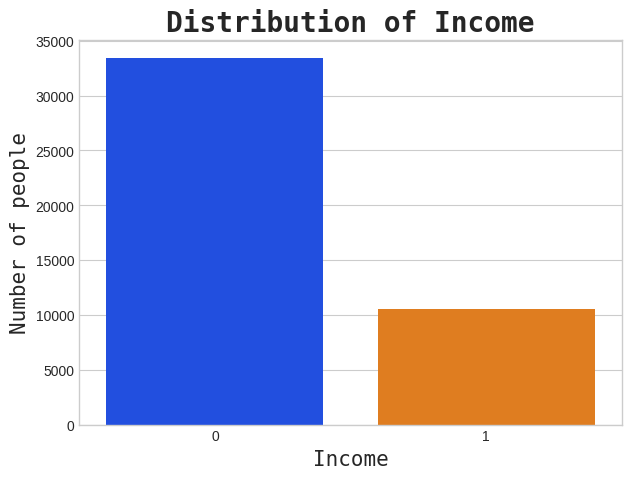

In [ ]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()




> `plt.style.use('fivethirtyeight')` is a Matplotlib command that applies a predefined plotting style to all subsequent plots created using Matplotlib. In this specific case, it applies the "fivethirtyeight" style, which mimics the style commonly seen in plots on the popular data-focused website FiveThirtyEight.



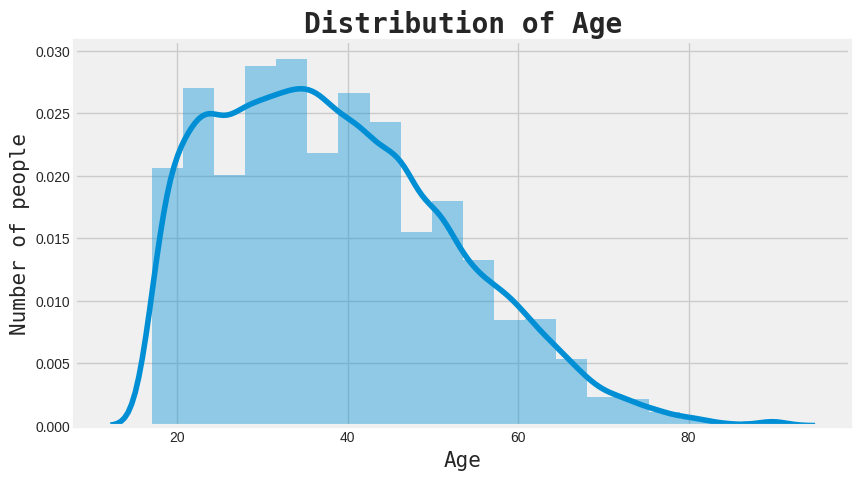

In [ ]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

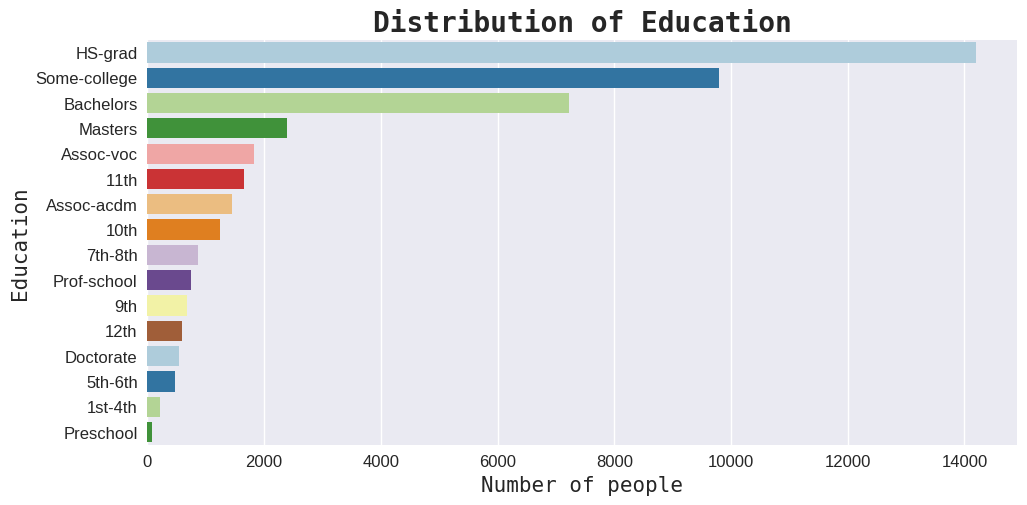

In [ ]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


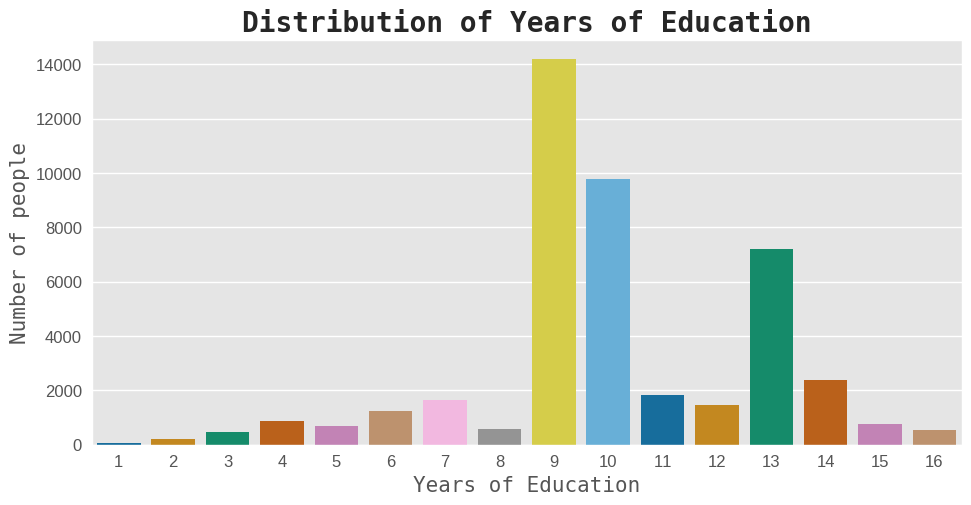

In [ ]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


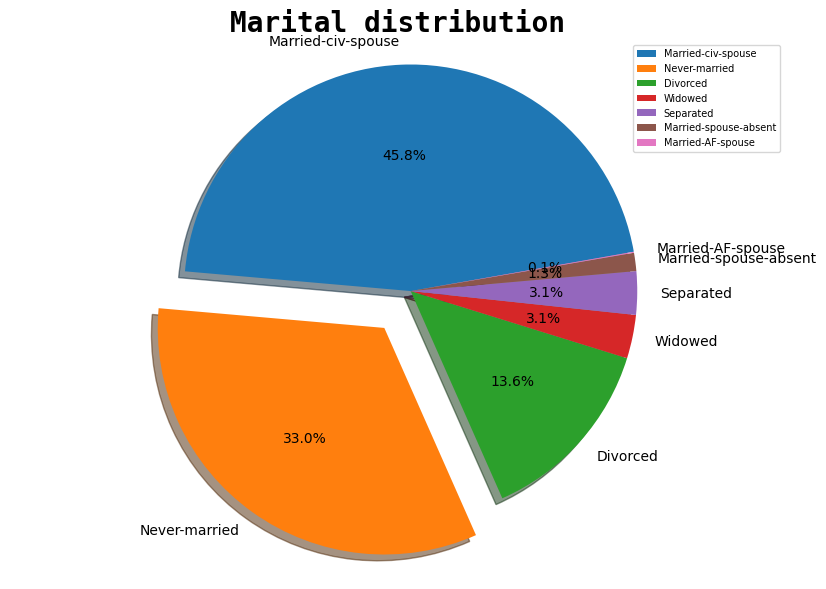

In [ ]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

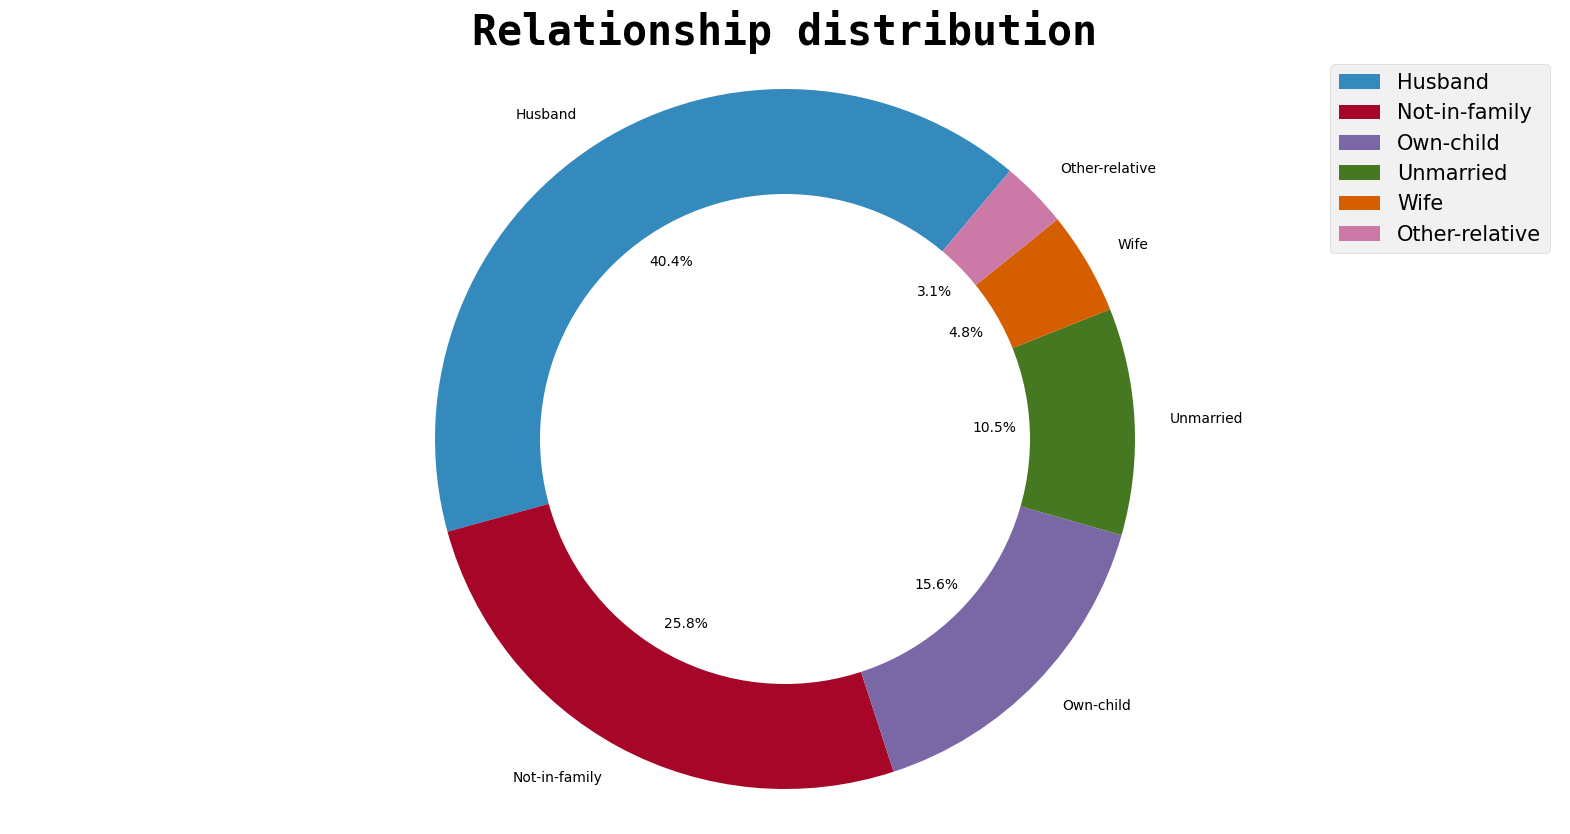

In [ ]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

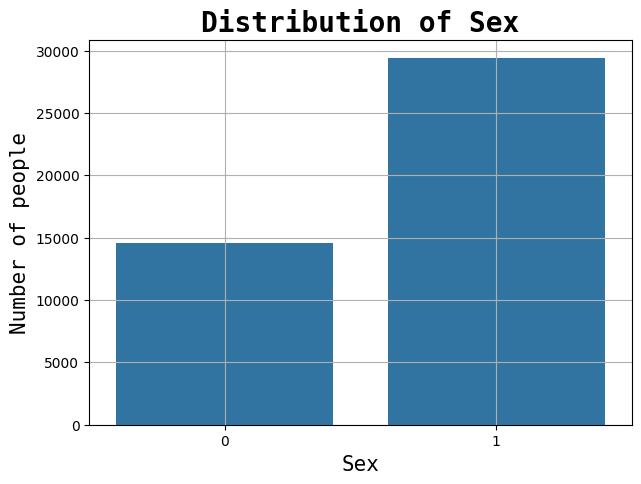

In [ ]:
# Creating a barplot for 'Sex'
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()


In [ ]:
!pip install squarify

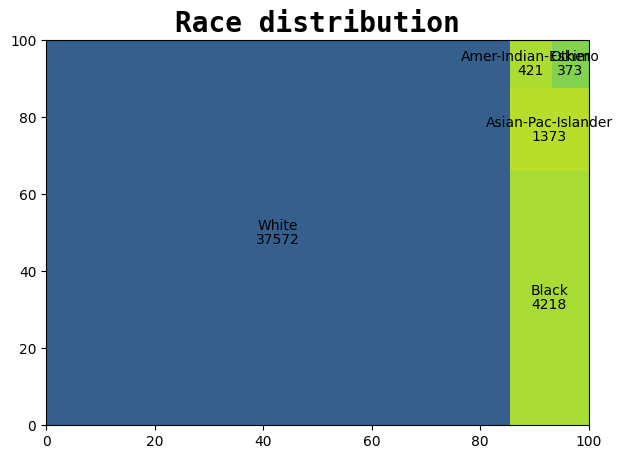

In [ ]:
# Creating a Treemap for 'Race'
import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

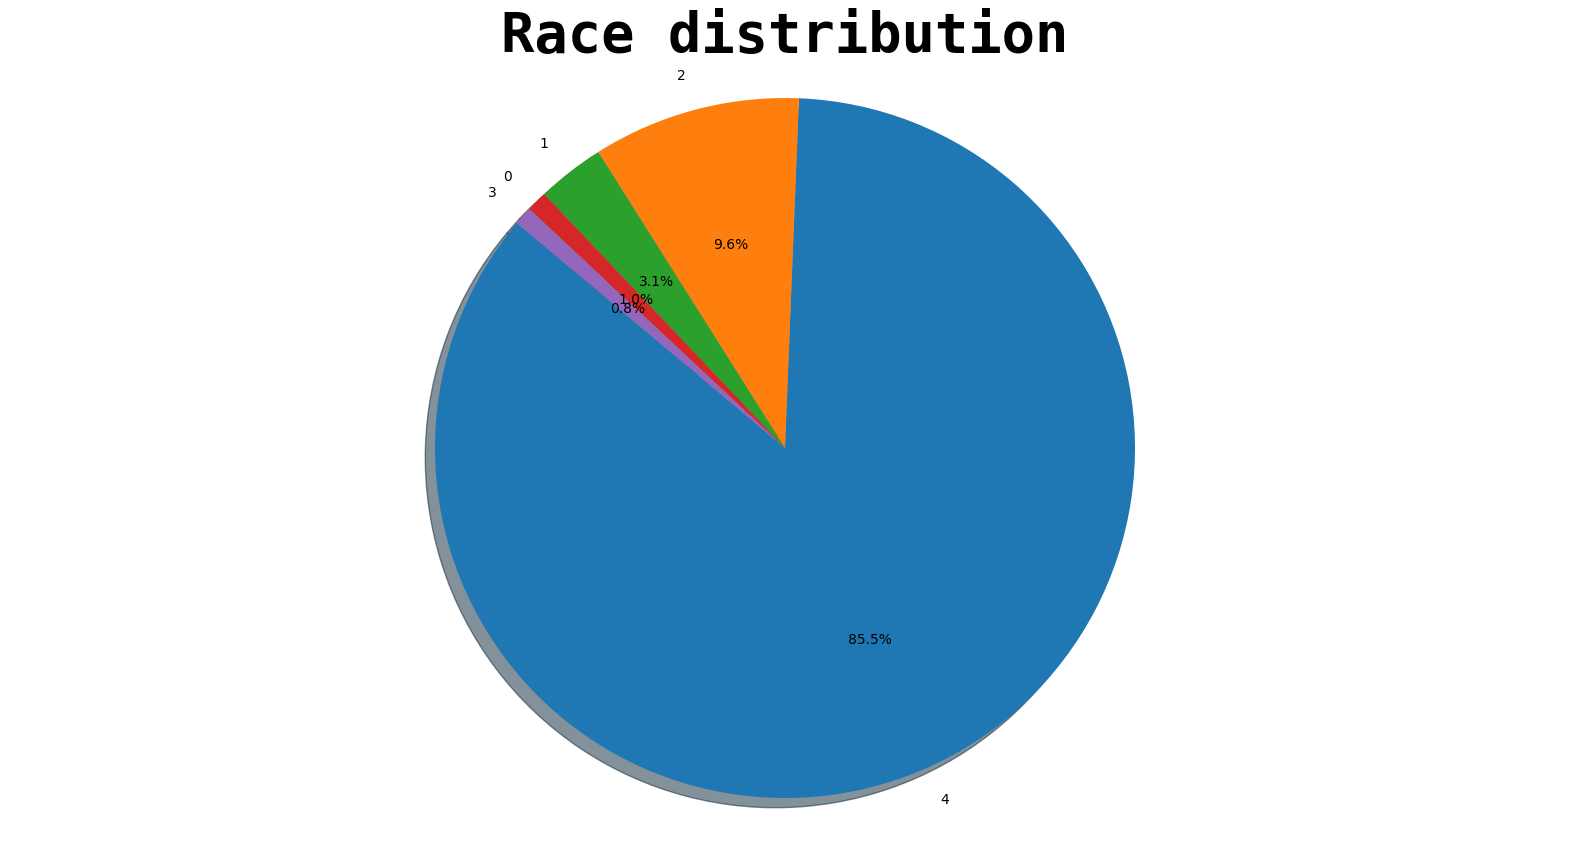

In [ ]:
# Creating a pie chart for 'Race'
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index, startangle=140, shadow=True, autopct='%1.1f%%')
plt.title('Race distribution', fontdict={'fontname': 'Monospace', 'fontsize': 40, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()


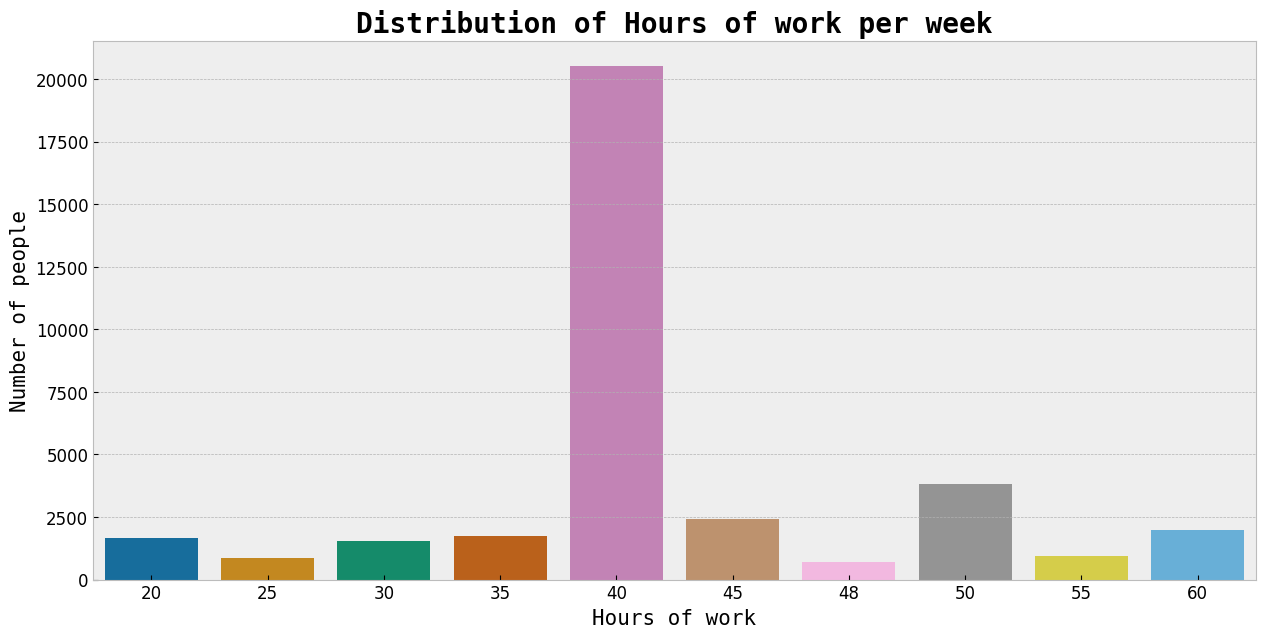

In [ ]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


### 2.2 Bivariate Analysis

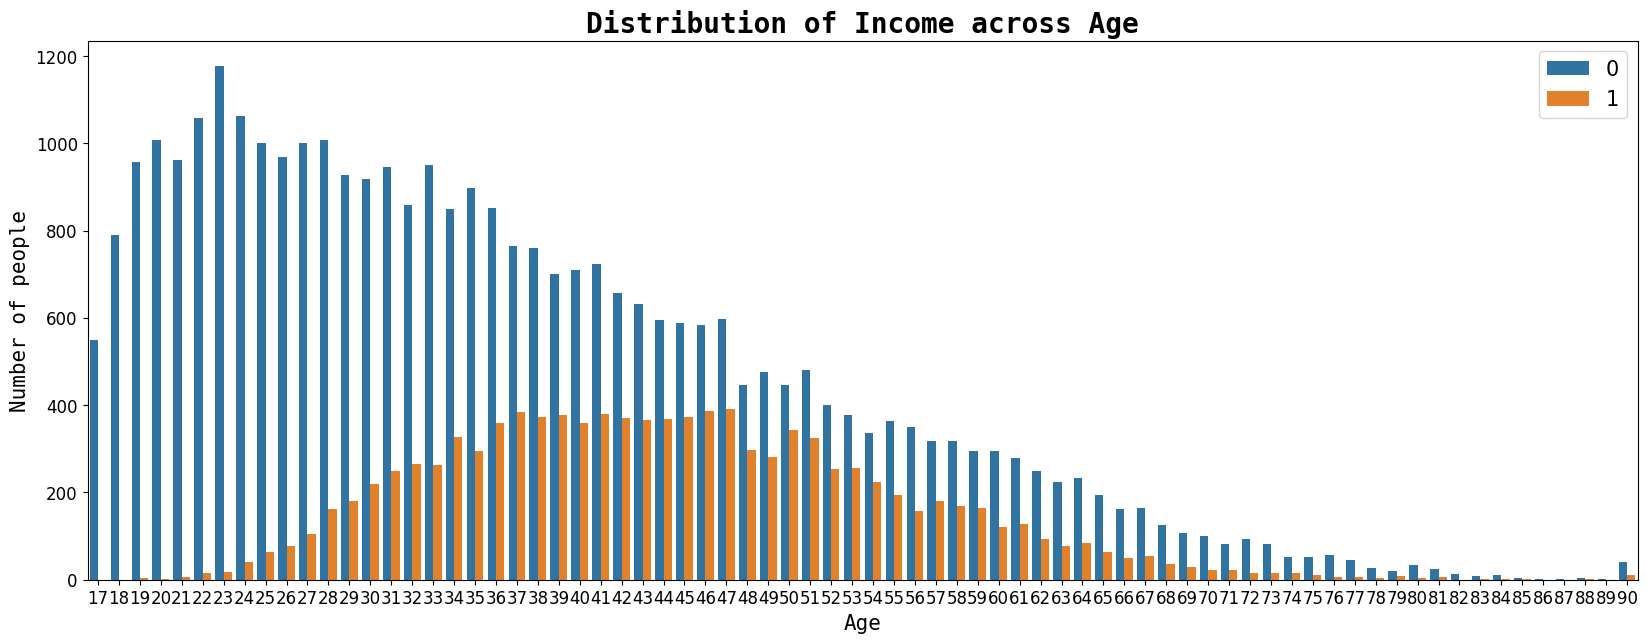

In [ ]:
# Reshape the data into long-form
melted_data = dataset.melt(id_vars=['age'], value_vars=['income'])

# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data=melted_data, x='age', hue='value')
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


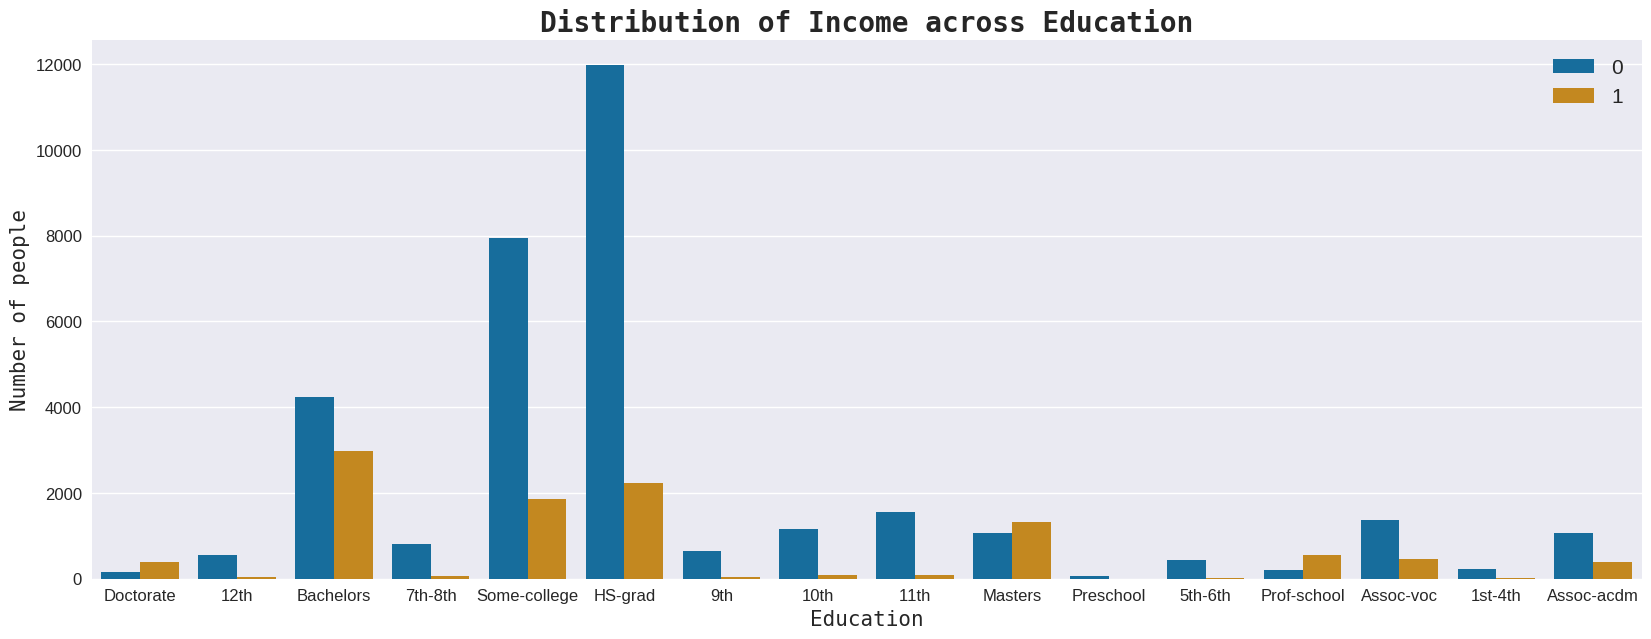

In [ ]:
# Reshape the data into long-form
melted_data = dataset.melt(id_vars=['education'], value_vars=['income'])

# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data=melted_data, x='education', hue='value', palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


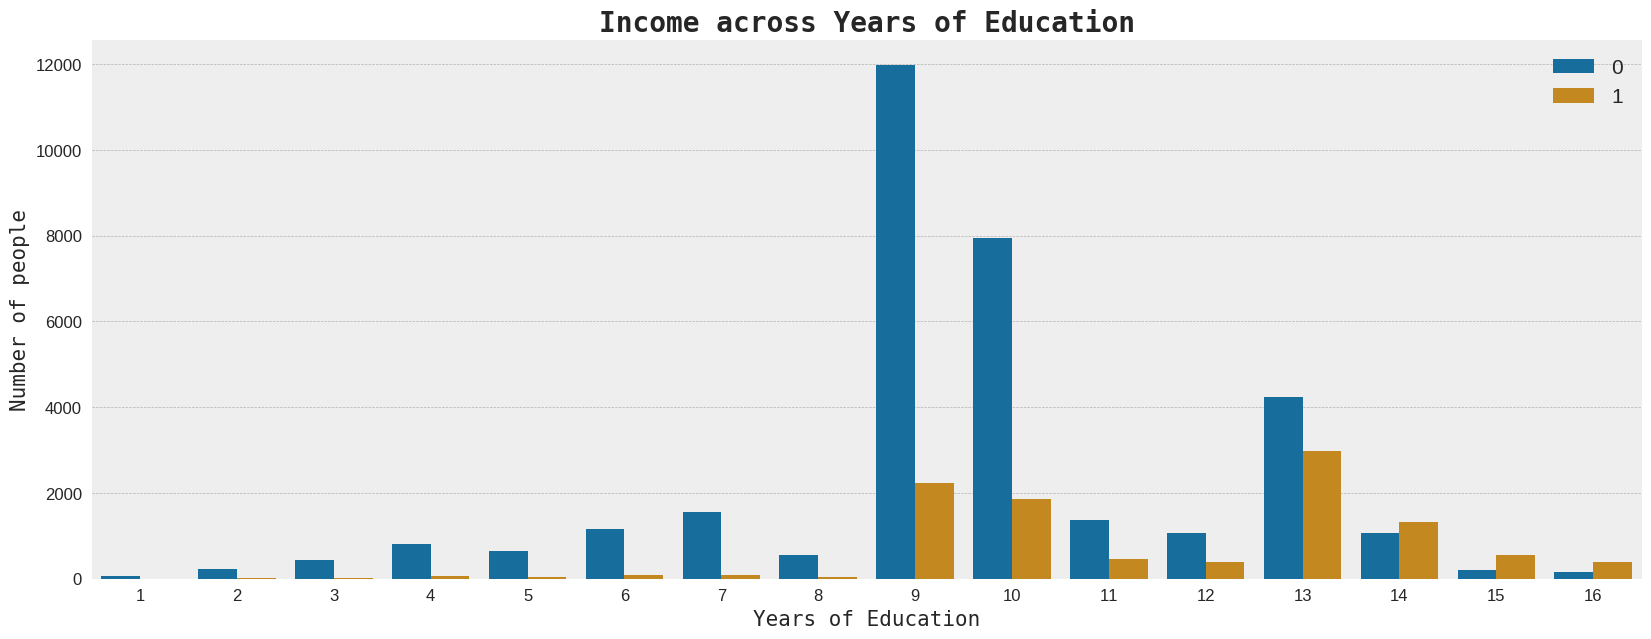

In [ ]:
# Reshape the data into long-form
melted_data = dataset.melt(id_vars=['education.num'], value_vars=['income'])

# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data=melted_data, x='education.num', hue='value', palette='colorblind')
plt.title('Income across Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


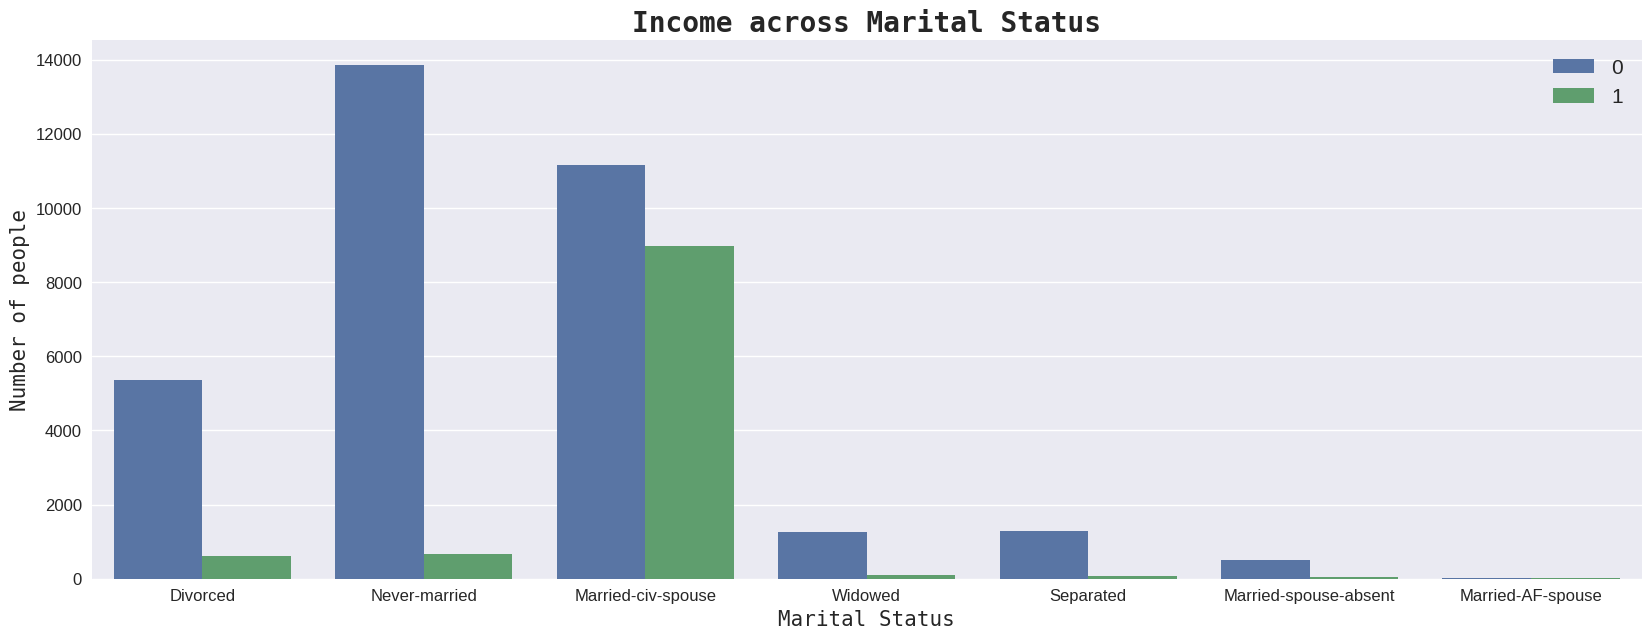

In [ ]:
melted_data = dataset.melt(id_vars=['marital.status'], value_vars=['income'])
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data=melted_data, x='marital.status', hue='value')
plt.title('Income across Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


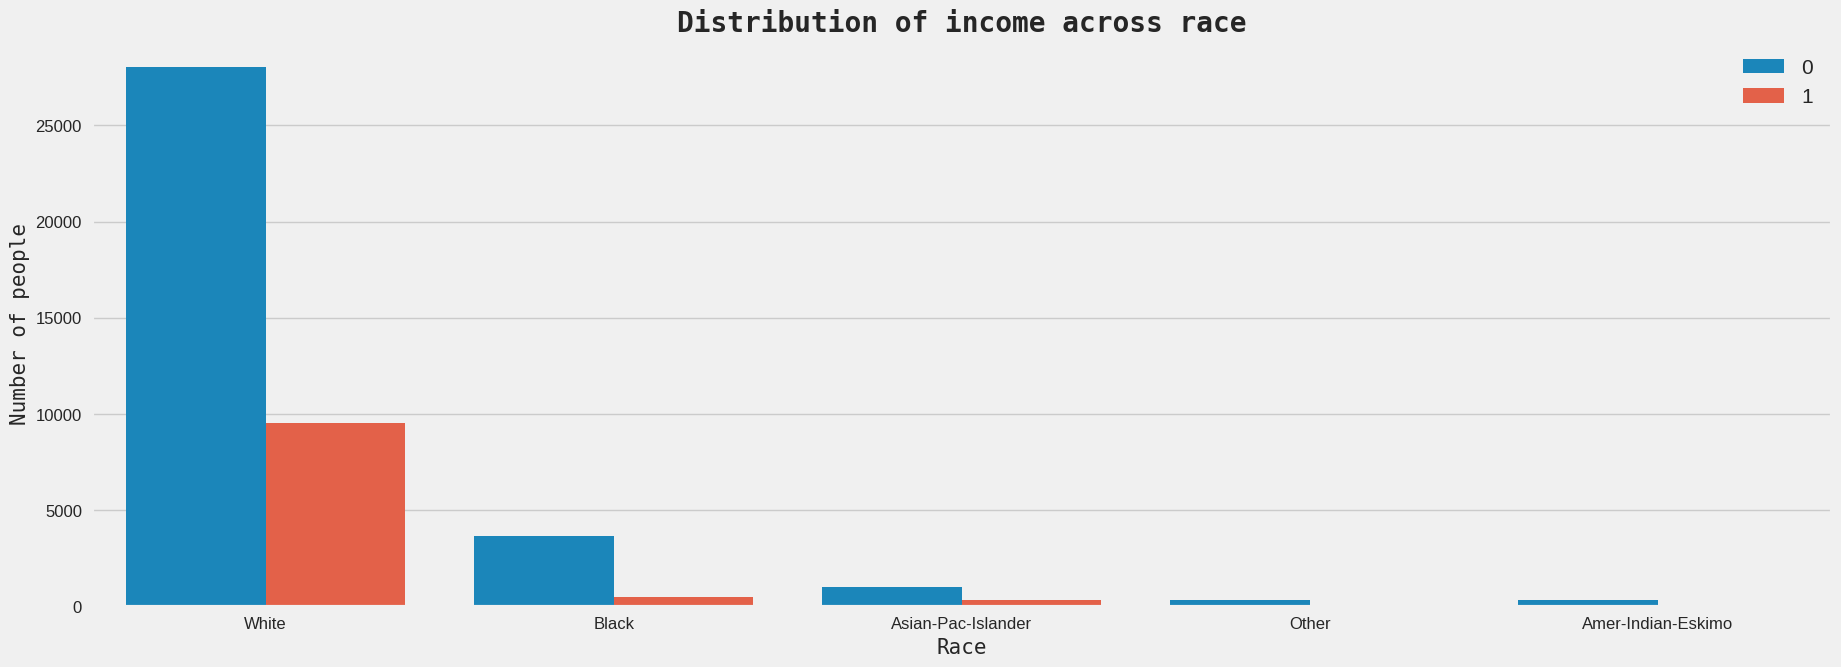

In [ ]:
melted_data = dataset.melt(id_vars=['race'], value_vars=['income'])
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data=melted_data, x='race', hue='value')
plt.title('Distribution of income across race', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


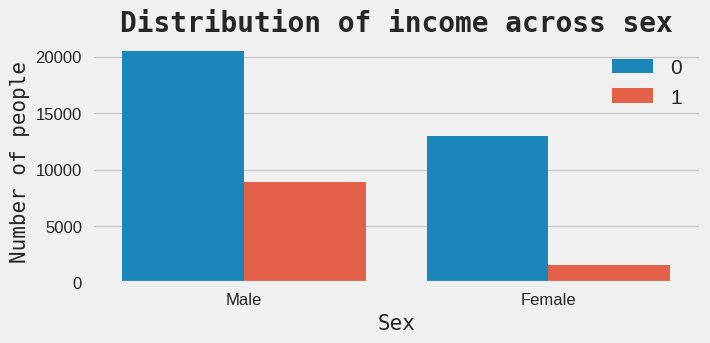

In [ ]:
melted_data = dataset.melt(id_vars=['sex'], value_vars=['income'])
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(data=melted_data, x='sex', hue='value')
plt.title('Distribution of income across sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


### 2.3: Multivariate Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataset['income'] = le.fit_transform(dataset['income'])

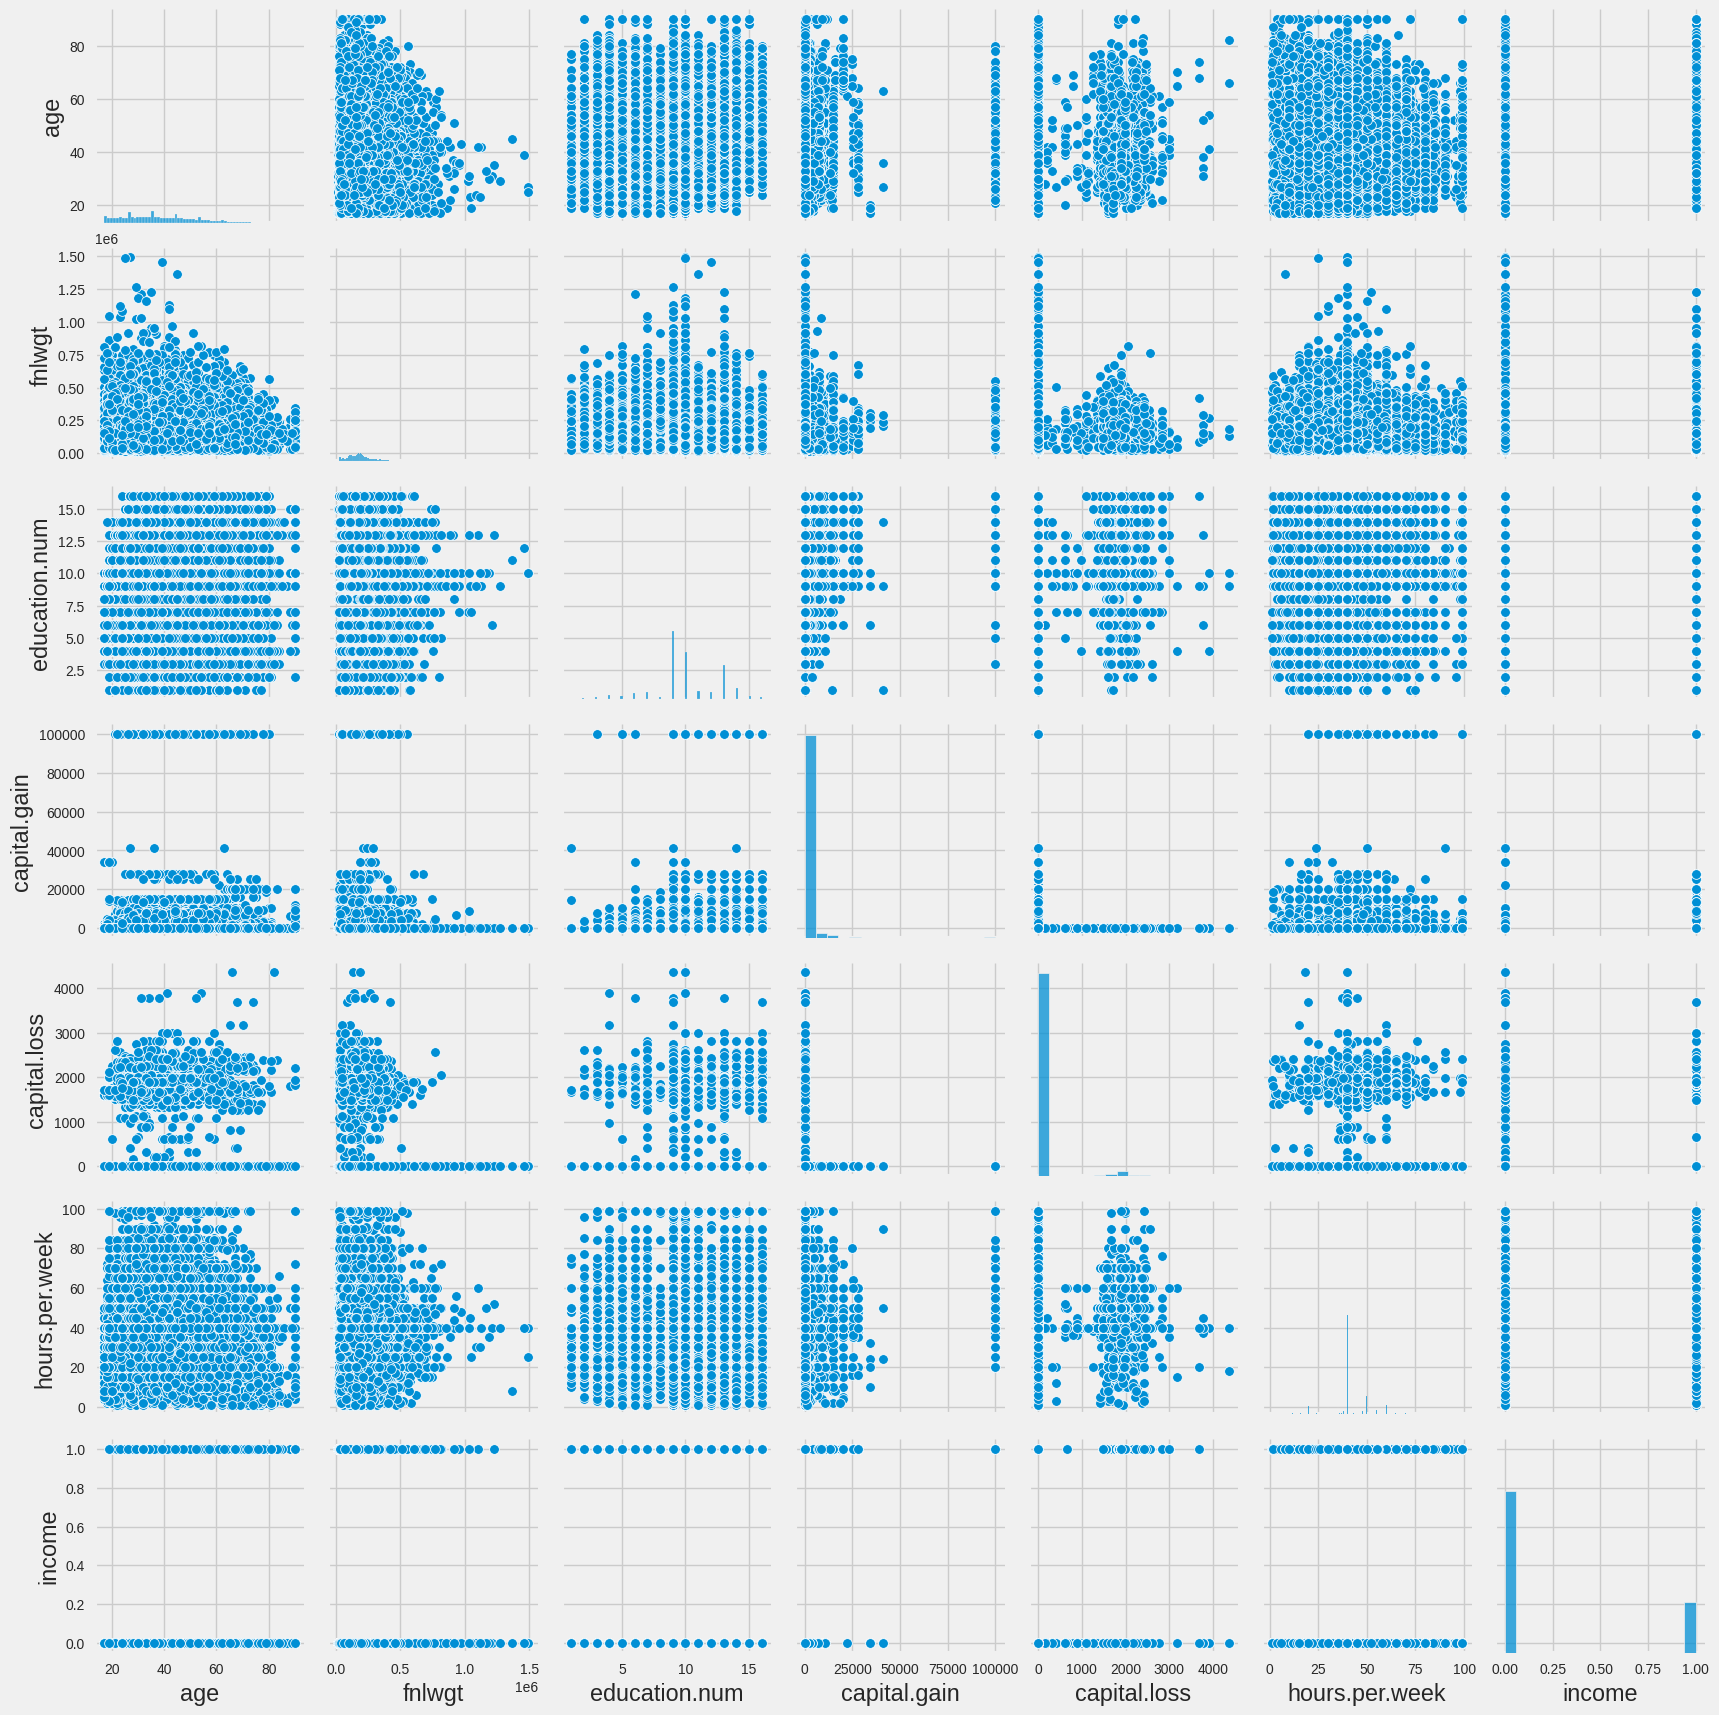

In [ ]:
# Creating a pairplot of dataset
sns.pairplot(dataset)
plt.savefig('multi1.png')
plt.show()

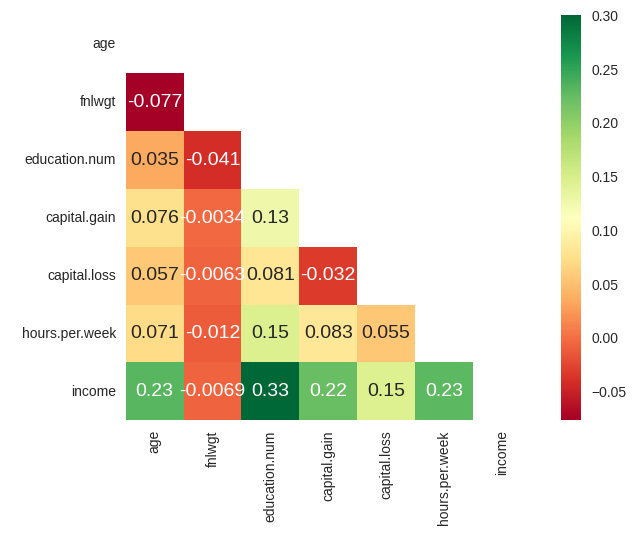

In [ ]:
# Exclude non-numeric columns from the correlation analysis
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
corr = dataset[numeric_columns].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()


## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [ ]:
dataset = dataset.replace('?', np.nan)

In [ ]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.68 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation         5.7 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.74 %
income             0.0 %
dtype: object

In [ ]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

### 3.2: Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

### 3.3: Feature Selection

In [ ]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [ ]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [ ]:
feature_imp = selector.feature_importances_

In [ ]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.46
1 4.02
2 17.34
3 3.69
4 8.57
5 7.35
6 7.32
7 9.39
8 1.44
9 2.81
10 8.73
11 2.74
12 9.65
13 1.51


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             43957 non-null  int64
 1   workclass       43957 non-null  int64
 2   fnlwgt          43957 non-null  int64
 3   education       43957 non-null  int64
 4   education.num   43957 non-null  int64
 5   marital.status  43957 non-null  int64
 6   occupation      43957 non-null  int64
 7   relationship    43957 non-null  int64
 8   race            43957 non-null  int64
 9   sex             43957 non-null  int64
 10  capital.gain    43957 non-null  int64
 11  capital.loss    43957 non-null  int64
 12  hours.per.week  43957 non-null  int64
 13  native.country  43957 non-null  int64
dtypes: int64(14)
memory usage: 4.7 MB


In [ ]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

### 3.4: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [ ]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    76.07 %
1    23.93 %
Name: proportion, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [ ]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [ ]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
1    50.0 %
0    50.0 %
Name: proportion, dtype: object

### 3.6: Creating a train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (53502, 8)
X_test shape: (13376, 8)
Y_train shape: (53502,)
Y_test shape: (13376,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [ ]:
Y_pred_log_reg = log_reg.predict(X_test)

### 4.3: Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [ ]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [ ]:
Y_pred_svc = svc.predict(X_test)

KeyboardInterrupt: 

## Step 5: Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

In [ ]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))